In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

### 1.A.Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [230]:
carname = pd.read_csv('/Users/deepakkumar/Downloads/USL_project/Part1+-+Car+name.csv')

### 1.B.Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [231]:
car_attr = pd.read_json('/Users/deepakkumar/Downloads/USL_project/Part1+-+Car-Attributes.json')

In [232]:
carname.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [233]:
car_attr.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### 1.C.Merge both the DataFrames together to form a single DataFrame 

In [234]:
#car_df = pd.merge(carname, car_attr, left_index=True, right_index=True)
#car_df = carname.join(car_attr)
car_df = pd.concat([carname, car_attr], axis=1)

In [235]:
car_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [236]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### 1.D.Print 5 point summary of the numerical features and share insights

In [237]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


<AxesSubplot:>

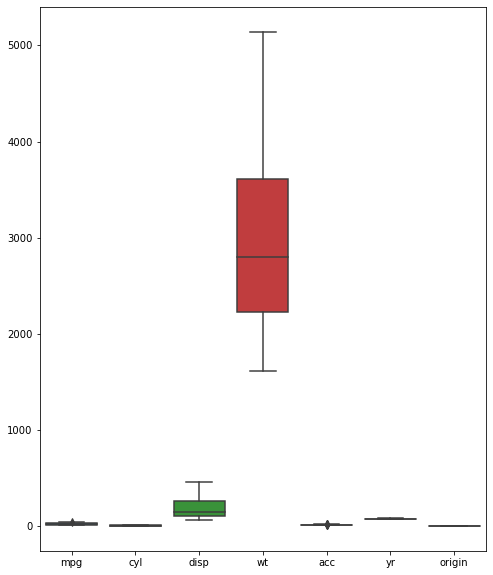

In [238]:
plt.figure(figsize=(8,10))
sns.boxplot(data=car_df)

In [239]:
car_df['car_name'].isnull().sum()

0

### 2.A.Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach

In [293]:
percent_missing = car_df.isnull().sum() * 100 / len(car_df)
missing_value_df = pd.DataFrame({'column_name': car_df.columns,
                                 'percent_missing': percent_missing * 100})

In [241]:
missing_value_df

,column_name,percent_missing
car_name,car_name,0.0
mpg,mpg,0.0
cyl,cyl,0.0
disp,disp,0.0
hp,hp,0.0
wt,wt,0.0
acc,acc,0.0
yr,yr,0.0
origin,origin,0.0


### 2.B.Check for duplicate values in the data and impute with the best suitable approach

In [278]:
car_df.duplicated().sum()

0

### 2.C.Plot a pairplot for all features.

<Figure size 864x1080 with 0 Axes>

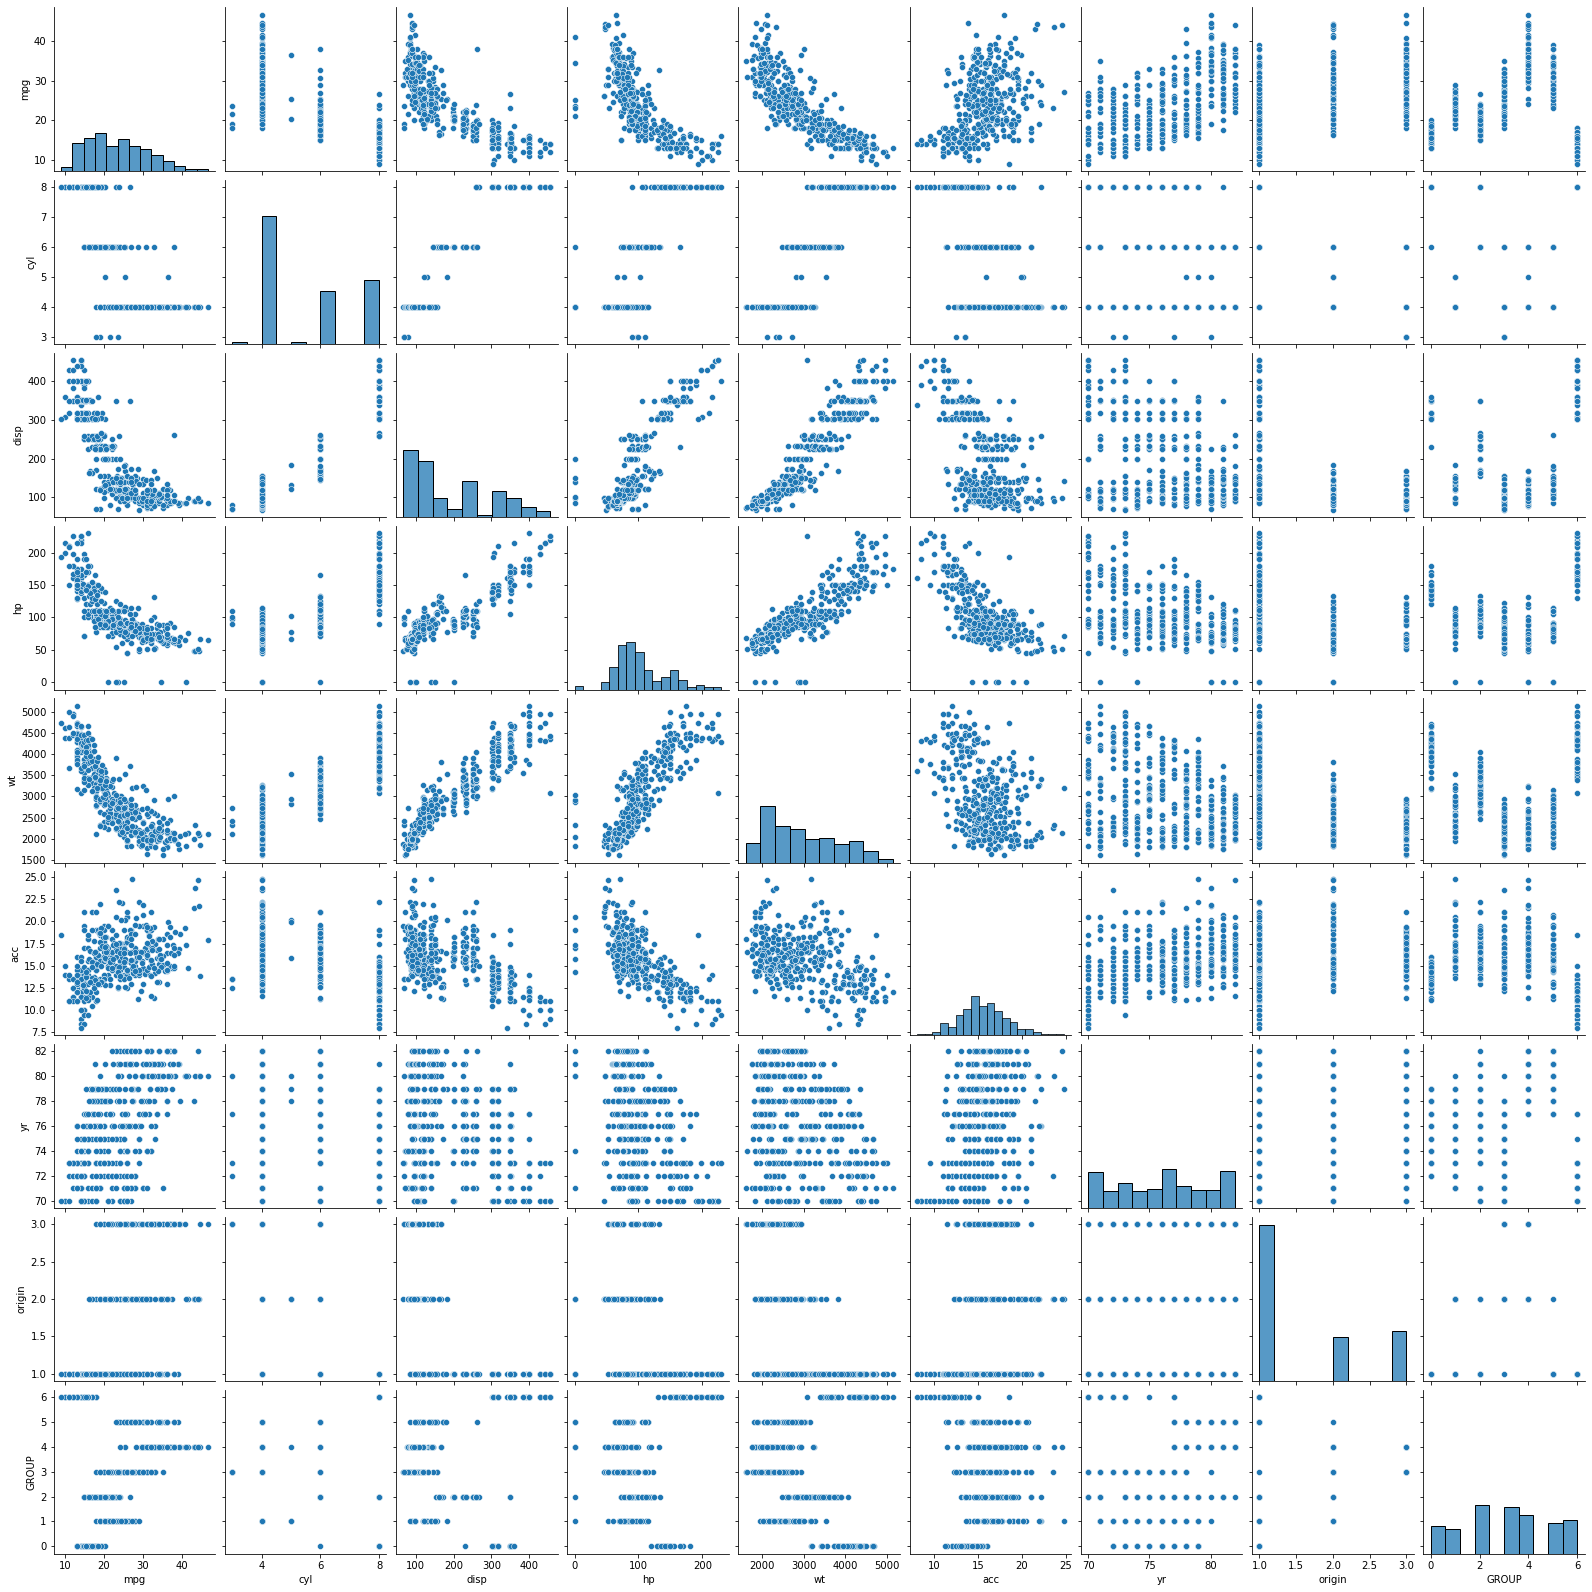

In [276]:
plt.figure(figsize=(12,15))
sns.pairplot(data=car_df)


### 2.D.Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

<AxesSubplot:xlabel='wt', ylabel='disp'>

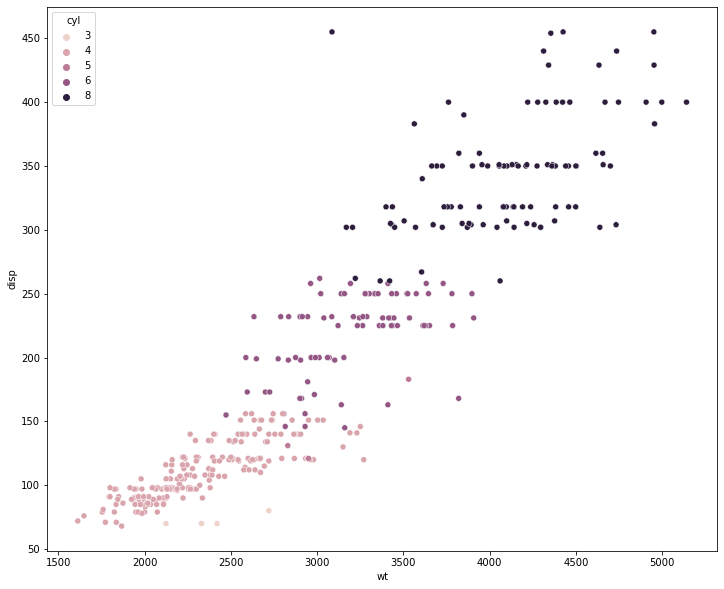

In [243]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=car_df, x='wt', y='disp', hue='cyl')

### 2.E.Share insights for Q2.d

Disp is positively correlated with wt

### 2.F.Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

<AxesSubplot:xlabel='wt', ylabel='mpg'>

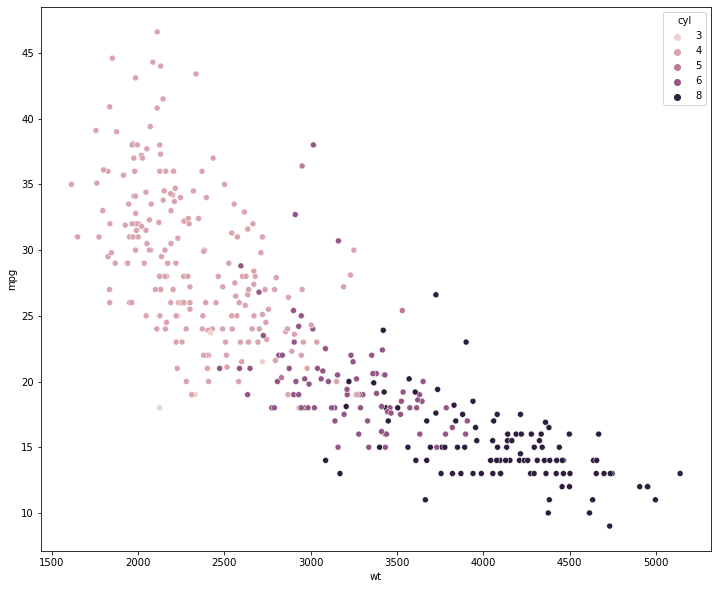

In [244]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=car_df, x='wt', y='mpg', hue='cyl')

### 2.G.Share insights for Q2.f.

mpg is negatively correlated with wt
Also, Higher the cylinder count, weight also increae

### 2.H.Check for unexpected values in all the features and datapoints with such values.

In [253]:
car_df['hp'] = car_df['hp'].replace('?', 0).astype('float')


In [254]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


### 3.A.Apply K-Means clustering for 2 to 10 clusters.
### 3.B.Plot a visual and find elbow point.

In [260]:
car_df_updated=car_df.iloc[:,1:]
car_df_Scaled=car_df_updated.apply(zscore)

In [261]:
car_df_updated.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

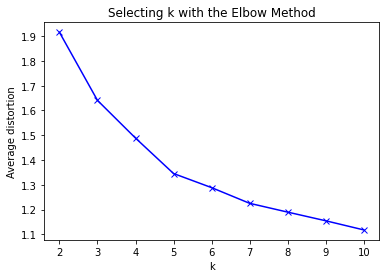

In [262]:
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_df_Scaled)
    prediction=model.predict(car_df_Scaled)
    meanDistortions.append(sum(np.min(cdist(car_df_Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / car_df_Scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### 3.C.On the above visual, highlight which are the possible Elbow points.

In [259]:
# Cluster bends more at point 5 and point 7

### 3.D.Train a K-means clustering model once again on the optimal number of clusters.

In [266]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(car_df_Scaled)
prediction=final_model.predict(car_df_Scaled)

### 3.E.Add a new feature in the DataFrame which will have labels based upon cluster value.

In [269]:
#Append the prediction 
car_df["GROUP"] = prediction
car_df_Scaled["GROUP"] = prediction
print("Groups Assigned : \n")
car_df.head()

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,2
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,2
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,2
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,2
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,2


### 3.F.Plot a visual and color the datapoints based upon clusters

In [270]:
car_dfClust = car_df.groupby(['GROUP'])
car_dfClust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,34.707407,4.086420,103.888889,70.839506,2197.753086,16.367901,80.049383,2.259259
1,25.157353,4.205882,135.595588,83.750000,2657.367647,17.073529,77.441176,1.176471
2,14.528866,7.979381,348.020619,161.804124,4143.969072,12.641237,73.628866,1.000000
3,26.120270,4.027027,101.824324,82.364865,2236.148649,15.944595,73.837838,2.500000
4,19.161538,6.179487,231.474359,99.089744,3282.948718,16.707692,75.589744,1.038462


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

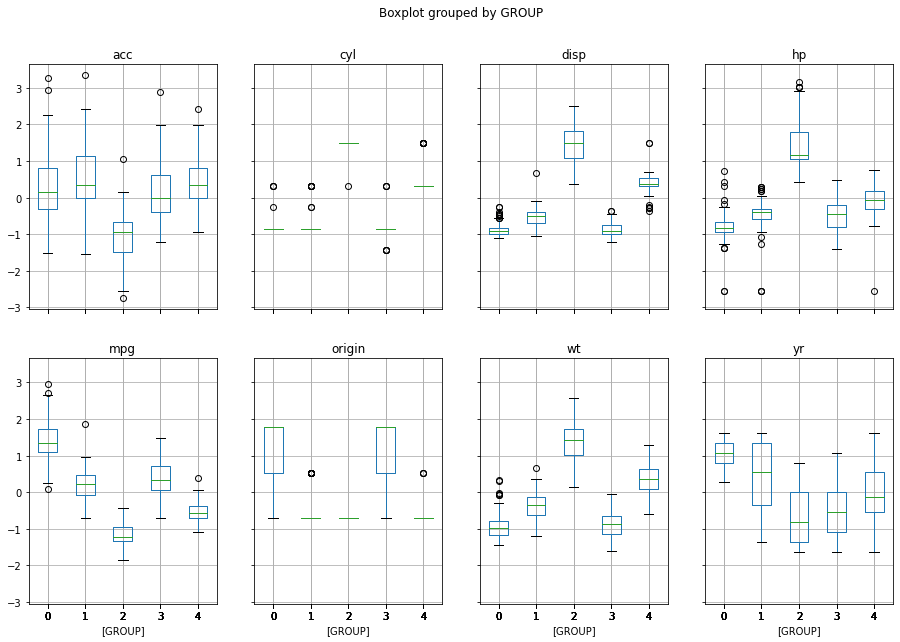

In [271]:
car_df_Scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [ ]:
# NOw, we will try with 7 clusters

Groups Assigned : 



array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

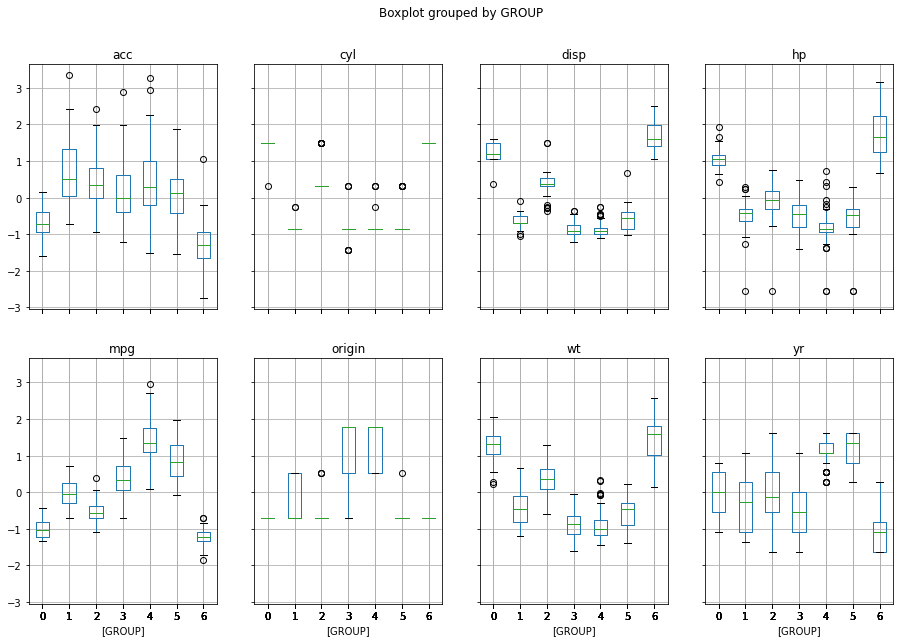

In [272]:
final_model=KMeans(7)
final_model.fit(car_df_Scaled)
prediction=final_model.predict(car_df_Scaled)
#Append the prediction 
car_df["GROUP"] = prediction
car_df_Scaled["GROUP"] = prediction
print("Groups Assigned : \n")
car_dfClust = car_df.groupby(['GROUP'])
car_dfClust.mean()
car_df_Scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# PART B

### 1.A.Read ‘vehicle.csv’ and save as DataFrame.

In [359]:
vehicle_data = pd.read_csv('/Users/deepakkumar/Downloads/USL_project/vehicle.csv')

In [360]:
vehicle_data.head(40)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [361]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

### 1.B.Check percentage of missing values and impute with correct approach.

In [364]:
percent_missing2 = (vehicle_data.isnull().sum() * 100 )/ len(vehicle_data)
missing_value_df2 = pd.DataFrame({'column_name': vehicle_data.columns,
                                 'percent_missing': percent_missing2 * 100})

In [365]:
missing_value_df2

,column_name,percent_missing
compactness,compactness,0.000000
circularity,circularity,59.101655
distance_circularity,distance_circularity,47.281324
radius_ratio,radius_ratio,70.921986
pr.axis_aspect_ratio,pr.axis_aspect_ratio,23.640662
max.length_aspect_ratio,max.length_aspect_ratio,0.000000
scatter_ratio,scatter_ratio,11.820331
elongatedness,elongatedness,11.820331
pr.axis_rectangularity,pr.axis_rectangularity,35.460993
max.length_rectangularity,max.length_rectangularity,0.000000


In [320]:
#for column in vehicle_data.columns:
#    if vehicle_data[column].isnull().sum() != 0:
#        vehicle_data[column].replace('NaN',np.mean(vehicle_data[column]))

In [371]:
updated_df = vehicle_data
updated_df['circularity']=updated_df['circularity'].fillna(updated_df['circularity'].mean())
updated_df['distance_circularity']=updated_df['distance_circularity'].fillna(updated_df['distance_circularity'].mean())
updated_df['radius_ratio']=updated_df['radius_ratio'].fillna(updated_df['radius_ratio'].mean())
updated_df['pr.axis_aspect_ratio']=updated_df['pr.axis_aspect_ratio'].fillna(updated_df['pr.axis_aspect_ratio'].mean())
updated_df['scatter_ratio']=updated_df['scatter_ratio'].fillna(updated_df['scatter_ratio'].mean())
updated_df['elongatedness']=updated_df['elongatedness'].fillna(updated_df['elongatedness'].mean())
updated_df['pr.axis_rectangularity']=updated_df['pr.axis_rectangularity'].fillna(updated_df['pr.axis_rectangularity'].mean())
updated_df['scaled_variance']=updated_df['scaled_variance'].fillna(updated_df['scaled_variance'].mean())
updated_df['scaled_variance.1']=updated_df['scaled_variance.1'].fillna(updated_df['scaled_variance.1'].mean())
updated_df['scaled_radius_of_gyration']=updated_df['scaled_radius_of_gyration'].fillna(updated_df['scaled_radius_of_gyration'].mean())
updated_df['scaled_radius_of_gyration.1']=updated_df['scaled_radius_of_gyration.1'].fillna(updated_df['scaled_radius_of_gyration.1'].mean())

updated_df['skewness_about']=updated_df['skewness_about'].fillna(updated_df['skewness_about'].mean())

updated_df['skewness_about.1']=updated_df['skewness_about.1'].fillna(updated_df['skewness_about.1'].mean())
updated_df['skewness_about.2']=updated_df['skewness_about.2'].fillna(updated_df['skewness_about.2'].mean())



updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

### 1.C.Visualize a Pie-chart and print percentage of values for variable ‘class’.

<AxesSubplot:ylabel='class'>

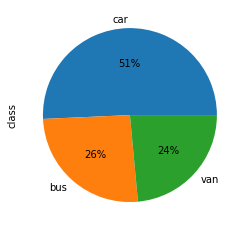

In [377]:
ax = updated_df['class'].value_counts()
ax.plot(kind='pie',autopct='%.0f%%')

### 1.D.Check for duplicate rows in the data and impute with correct approach.

In [378]:
updated_df.duplicated().sum()

0

In [379]:
# No duplicate rows so no imputation is required.

### 2.A.Split data into X and Y. [Train and Test optional]

In [381]:
X = updated_df.iloc[:,0:18]
y = updated_df['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

### 2.B.Standardize the Data.

In [382]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

### 3.A.Train a base Classification model using SVM

In [399]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_sd, y_train)

SVC()

### 3.B.Print Classification metrics for train data.

In [386]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00148148  0.69167163  0.79308171  0.6757266   0.07766592  0.13193425
   0.8101545  -0.78462567  0.81322328  0.6899308   0.75300945  0.81343553
   0.59116379 -0.25761534  0.24404653  0.16643749  0.30572085  0.37699504]
 [ 0.69167163  1.00148148  0.79045714  0.62895543  0.16442804  0.23021413
   0.84694851 -0.8216384   0.8430584   0.9637686   0.79540066  0.83818276
   0.92630895  0.04224919  0.14635765  0.0042676  -0.08351635  0.06591813]
 [ 0.79308171  0.79045714  1.00148148  0.75939751  0.1482043   0.24042889
   0.90447245 -0.91118603  0.89445126  0.7784379   0.85779712  0.88824672
   0.70528246 -0.22532842  0.11744525  0.27982466  0.15523036  0.34347808]
 [ 0.6757266   0.62895543  0.75939751  1.00148148  0.67020345  0.47345468
   0.72784324 -0.78207719  0.70265408  0.58685059  0.79643523  0.71327999
   0.54326742 -0.14193109  0.04225533  0.18013043  0.37389757  0.47233196]
 [ 0.07766592  0.16442804  0.1482043   0.67020345  1.00148148  0.69336075
   0.0969349

In [387]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.16991969  68.52812333  79.76249329  86.25080351  91.40627498
  94.16473685  96.09302647  97.33141495  98.19182344  98.69771504
  99.08301644  99.35149193  99.55746002  99.70951292  99.82782057
  99.92433022  99.97909352 100.        ]


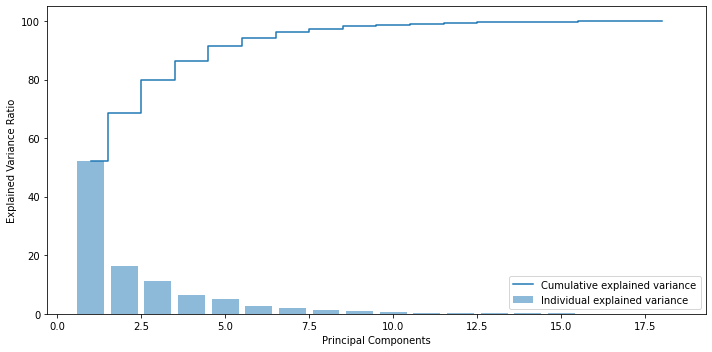

In [388]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [389]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(9.404497522846896,
  array([ 0.2751487 ,  0.29351145,  0.30422729,  0.26722831,  0.08035601,
          0.0923247 ,  0.31639379, -0.31354044,  0.31359288,  0.28477983,
          0.30828425,  0.31382988,  0.27243663, -0.02152713,  0.04273765,
          0.0627536 ,  0.0336639 ,  0.07895637])),
 (2.94883884246559,
  array([ 0.13301309, -0.11981456,  0.07521149,  0.16740531,  0.07640023,
         -0.044611  , -0.04512968, -0.01313274, -0.05488951, -0.10899957,
         -0.07279728, -0.0494805 , -0.20639867, -0.49995017,  0.05058412,
          0.11779601,  0.54593075,  0.5427405 ])),
 (2.025182425177959,
  array([-0.10942197, -0.03519196, -0.05329235,  0.29510301,  0.63805338,
          0.58644908, -0.10104863,  0.05828593, -0.11366129, -0.02526913,
          0.06568062, -0.11162098, -0.0472505 ,  0.27205351, -0.11838989,
         -0.05833832,  0.04793805,  0.07697969])),
 (1.169626056138083,
  array([ 0.08273009,  0.18891645, -0.07984052, -0.03632836,  0.04740017,
          0.02235856, -0

### 5. A.Explain pre-requisite/assumptions of PCA

Following are the assumptions of PCA:

1. Independent variables are highly correlated to each other.
2. Variables included are metric level or nominal level.
3. Features are low dimensional in nature.
4. Independent variables are numeric in nature.
5. Bartlett-Test: The Bartlett test is statistically significant as.
H0: Variables are uncorrelated.
H1: Variables are correlated.

### 5.B.Explain advantages and limitations of PCA

### Advantages:

Advantages of Principal Component Analysis

1. Removes Correlated Features: In a real world scenario, this is very common that we get thousands of features in the dataset. We cannot run our algorithm on all the features as it will reduce the performance of algorithm and it will not be easy to visualize that many features in any kind of graph. So, we MUST reduce the number of features in our dataset. 

We need to find out the correlation among the features (correlated variables). Finding correlation manually in thousands of features is nearly impossible, frustrating and time-consuming. PCA does this efficiently.

After implementing the PCA on dataset, all the Principal Components are independent of one another. There is no correlation among them.

2. Improves Algorithm Performance: With so many features, the performance of algorithm will drastically degrade. PCA is a very common way to speed up our Machine Learning algorithm by getting rid of correlated variables which don't contribute in any decision making. The training time of the algorithms reduces significantly with less number of features.

So, if the input dimensions are too high, then using PCA to speed up the algorithm is a reasonable choice. 

3. Reduces Overfitting: Overfitting mainly occurs when there are too many variables in the dataset. So, PCA helps in overcoming the overfitting issue by reducing the number of features.

4. Improves Visualization: It is very hard to visualize and understand the data in high dimensions. PCA transforms a high dimensional data to low dimensional data (2 dimension) so that it can be visualized easily. 


### Limitations :

1. Independent variables become less interpretable: After implementing PCA on the dataset, original features will turn into Principal Components. Principal Components are the linear combination of original features. Principal Components are not as readable and interpretable as original features.

2. Data standardization is must before PCA: We must standardize data before implementing PCA, otherwise PCA will not be able to find the optimal Principal Components. 


3. PCA is affected by scale, so we need to scale the features in our data before applying PCA. Use StandardScaler from Scikit Learn to standardize the dataset features onto unit scale (mean = 0 and standard deviation = 1) which is a requirement for the optimal performance of many Machine Learning algorithms.

4. Information Loss: Although Principal Components try to cover maximum variance among the features in a dataset, if we don't select the number of Principal Components with care, it may miss some information as compared to the original list of features.